# Data Cleaning



## Introduction


When working with data sets, you will find that they often require a bit of cleaning. For instance, we need to clean our data when Pandas originally read the data types incorrectly, records are duplicated, the data contains special characters or missing value, or there are slightly different references to the same entity. 


Every data analyst must therefore know how to clean the data he or she is working with before analyzing it. In this lesson, you will learn about some of the most common problems that make data messy and methods for correcting those problems and cleaning your data.



The data set we are going to be using for this lesson is a messy version of the vehicles data set we worked with in the previous lesson. Let's import this version of our data set so that we can then practice cleaning it up.

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
data = pd.read_csv('vehicles/vehicles_messy.csv')
data.head()

NameError: name 'pd' is not defined

## Examining Data for Potential Issues



One of the first things we want to do is examine the data and look for any potential issues. Some of the things we are interested in identifying in the data at this stage include:

- Missing values;
- Special characters;
- Incorrect values;
- Extreme values or outliers;
- Duplicate records;
- Incorrect data types.



The presence of these may cause problems when it's time to analyze the data, so we want to make sure we address them beforehand. We can start by visually inspecting the data using the head method, which will show us the first 5 rows of data.

In [7]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## Missing Values 



From this initial view, we can see that our data set contains some columns that have missing values in them and others that seem to have a lot of zero values. 

Let's see how prevalent missing values are in our data. We can use the Pandas isnull method to check whether the value in each field is missing (null) and return either True or False for each field. 

We can use the sum method to total up the number of True values by column, and then we can add a condition using square brackets that will filter the data and show us only columns where the number of null values were greater than zero.

In [8]:
# use isnull() and sum() to obtain the columns for which there are more than 0 null values

null_cols = data.isnull().sum()
null_cols
null_cols[null_cols > 0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [9]:
null_cols

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

We can see that some columns have relatively few null values while others have tens of thousands of nulls. For fields that have a lot of null values, you will often have to make a **judgement call.** If you don't think the information is going to be very useful to your analysis, then you would **remove those columns from your data frame.** In Pandas, we can do that using the drop method. 

For our purposes, let's remove the columns that have more than 10,000 null values in them. We will add these column names to a list, and then we will pass those columns to the drop method and indicate that we want columns (not rows) dropped by setting the axis parameter to 1.

In [5]:
# drop the columns for which there are more than 10000 null values

drop_cols = list(null_cols[null_cols > 10000].index)
data = data.drop(drop_cols, axis=1)

In [6]:
data.head() 

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


This leaves us with just a handful of remaining columns that have null values. Of the columns that remain, it looks like the cylinders column and the displ column have a similar number of nulls. Perhaps they are missing for similar reasons. We can investigate this by **subsetting the data set** and looking at just the records where displ is null and just the columns we think will be informative in allowing us to determine a reason.

In [7]:
null_displ = data[(data['displ'].isnull()==True)]
null_displ = null_displ[['year', 'make', 'model', 'transmis', 'drive','fuelType','cylinders', 'displ']]
null_displ

,year,make,model,transmis,drive,fuelType,cylinders,displ
7138,2000,Nissan,Altra EV,NaN,NaN,Electricity,NaN,NaN
7139,2000,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8143,2001,Toyota,RAV4 EV,NaN,2-Wheel Drive,Electricity,NaN,NaN
8144,2001,Ford,Th!nk,NaN,NaN,Electricity,NaN,NaN
8146,2001,Ford,Explorer USPS Electric,NaN,2-Wheel Drive,Electricity,NaN,NaN
...,...,...,...,...,...,...,...,...
30969,2017,Kia,Soul Electric,Automatic (A1),Front-Wheel Drive,Electricity,NaN,NaN
30972,2016,Tesla,Model S (60 kW-hr battery pack),Automatic (A1),Rear-Wheel Drive,Electricity,NaN,NaN
30973,2016,Tesla,Model S AWD - 60D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN
30974,2016,Tesla,Model S AWD - P100D,Automatic (A1),All-Wheel Drive,Electricity,NaN,NaN


We can see that most of the time, **cylinders is null when displ is null** and that the most of the records where both fields are null have **a fuel type of Electricity**. This makes sense, as electric cars do not have cylinders and can therefore not have any displacement. In this case, it would make sense to replace these null values with zeros. Pandas makes it easy to do that with the fillna method.

In [8]:
data[['displ', 'cylinders']] = data[['displ', 'cylinders']].fillna(0)
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In this example, we filled the nulls in with zeros, but there are other strategies for filling in nulls. Depending on the circumstances, you might want to replace nulls with the column mean or mode values. Once you get more advanced, you can even use a variety of predictive imputation methods.


## Incorrect Values



In addition to null values, we also want to try to identify any values that seem incorrect. For example, in the previous section, we learned that a vehicle without cylinders should not have displacement and vice versa. Let's check to see if there are any cases that violate these rules.

In [9]:
# check if it is really the case that cars without cylinders have 0 displacement
test = data[(data['cylinders']==0) & (data['displ']!=0)]

In [10]:
test[['year', 'make', 'model', 'transmis', 'drive','fuelType','cylinders', 'displ']]

,year,make,model,transmis,drive,fuelType,cylinders,displ
21506,1986,Mazda,RX-7,Manual 5-spd,Rear-Wheel Drive,Regular,0.0,1.3


Here we have identified a vehicle with a regular gasoline engine that reportedly does not have any cylinders but does have a value for displacement. The way we would correct this would be to either perform some domain research or ask a domain expert to find out how many actual cylinders this vehicle had. Alternatively, you can also try to look at similar vehicles in the data set and determine the most likely value for this field.



Suppose that using one of the aforementioned methods, we found out that this vehicle actually has a 4 cylinder engine. Once we have this information, we can use the loc method to update that specific value in the data frame.

In [11]:
# change the cylinder value to 4 using .loc 
data.loc[(data['cylinders']==0) & (data['displ']!=0), 'cylinders'] = 4

In [12]:
data.loc[21506, ['year', 'make', 'model', 'transmis', 'drive','fuelType','cylinders', 'displ']]

year                     1986
make                    Mazda
model                    RX-7
transmis         Manual 5-spd
drive        Rear-Wheel Drive
fuelType              Regular
cylinders                   4
displ                     1.3
Name: 21506, dtype: object

Challenge: Try to find other values that might be incorrect in the data set based on what you know about automobiles and correct them.

## Extreme Values and Outliers


Now that we have removed columns with missing values, we should look for outliers, or extreme values, in the columns that remain. These outliers can influence our aggregations when we are analyzing data later, so we want to make sure we address them during our data cleaning stage.



A common method for identifying outliers is one that leverages the interquartile range (IQR). Once the IQR is calculated, it is multiplied by a constant (typically 1.5) and lower and upper bounds are established at:

- 25th Percentile - (IQR x 1.5)
- 75th Percentile + (IQR x 1.5)

Any values outside this range are potential outliers and should be investigated.




Let's look at how we would do this for our data set using Python. We will use the Pandas describe function to easily calculate the 25th and 75th percentiles for every column and transpose the results so that we can easily reference the values in calculating the interquartile ranges.

In [13]:
from IPython.display import Image
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg")

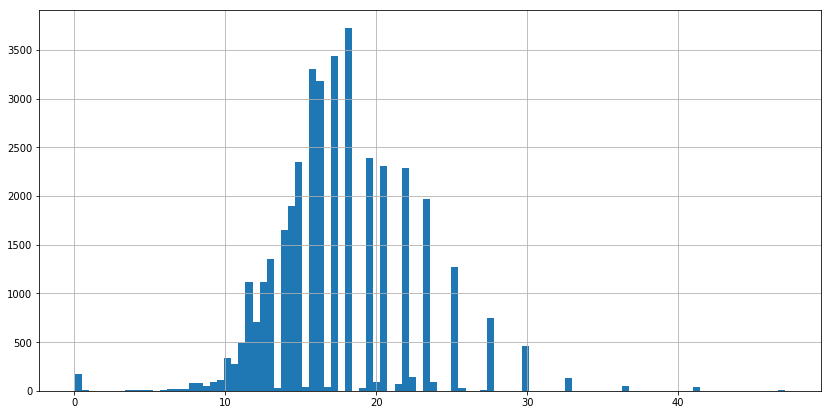

In [14]:
plt.figure(figsize=(14,7))
data['barrels08'].hist(bins=100)  

In [15]:
data['barrels08'].median()

17.347894736842107

In [16]:
np.quantile(data['barrels08'], 0.25)

14.330869565217393

In [17]:
np.quantile(data['barrels08'], 0.75)

20.600625

In [18]:
# "Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR."
stats = data.describe().transpose()
stats.head()

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000


In [19]:
stats['IQR'] = stats['75%'] - stats['25%']
stats.head()

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000


We will now create an empty data frame called outliers with the same columns as our data set. Then we are going to determine which rows (i.e. data points) in our data are outliers with respect to the barrels08 column. 

In [20]:
stats.at['barrels08','IQR']

6.269755434782608

In [21]:
outliers = pd.DataFrame(columns=data.columns)

iqr = stats.at['barrels08','IQR']
# Print the IQR for 'barrels08'
iqr

6.269755434782608

In [22]:
# Compute the cut-off 
cutoff = iqr * 1.5
cutoff

9.404633152173911

In [23]:
# Define a lower limit and upper limit 
lower = stats.at['barrels08','25%'] - cutoff
upper = stats.at['barrels08','75%'] + cutoff
print(lower)
print(upper)

4.9262364130434815
30.005258152173912


In [24]:
results = data[(data['barrels08'] < lower) | (data['barrels08'] > upper)]
results.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
47,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
58,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
69,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
80,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
275,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Standard Pickup Trucks,1993,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [25]:
results['Outlier'] = 'barrels08'
outliers = outliers.append(results)
outliers.head()

,Outlier,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge120,charge240,...,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,transmis,year,youSaveSpend
47,barrels08,11.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
58,barrels08,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
69,barrels08,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
80,barrels08,11.0,0.0,14.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
275,barrels08,11.0,0.0,16.0,0.0,Standard Pickup Trucks,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 4-spd,1993,-10000


In [26]:
outliers.head()

,Outlier,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge120,charge240,...,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,transmis,year,youSaveSpend
47,barrels08,11.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
58,barrels08,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
69,barrels08,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
80,barrels08,11.0,0.0,14.0,0.0,Vans,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
275,barrels08,11.0,0.0,16.0,0.0,Standard Pickup Trucks,32.961,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,Automatic 4-spd,1993,-10000


Because we want to determine the outliers for **all relevant columns**, we will loop through each column in the data calculating the lower and upper bounds, retrieving records where the value for that column falls outside the bounds we established, and appending those results to our outlier data frame.

In [27]:
# Create a column of outliers

outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

In [28]:
outliers

,Outlier,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge120,charge240,...,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,transmis,year,youSaveSpend
47,barrels08,11.0000,0.0,15.0000,0.0,Vans,32.961000,0.000000,0.0,0.0,...,0,0,0,0.0,0.00,0.0,0.00,Automatic 3-spd,1985,-10000
58,barrels08,12.0000,0.0,15.0000,0.0,Vans,32.961000,0.000000,0.0,0.0,...,0,0,0,0.0,0.00,0.0,0.00,Automatic 3-spd,1985,-10000
69,barrels08,12.0000,0.0,15.0000,0.0,Vans,32.961000,0.000000,0.0,0.0,...,0,0,0,0.0,0.00,0.0,0.00,Automatic 3-spd,1985,-10000
80,barrels08,11.0000,0.0,14.0000,0.0,Vans,32.961000,0.000000,0.0,0.0,...,0,0,0,0.0,0.00,0.0,0.00,Automatic 3-spd,1985,-10000
275,barrels08,11.0000,0.0,16.0000,0.0,Standard Pickup Trucks,32.961000,0.000000,0.0,0.0,...,0,0,0,0.0,0.00,0.0,0.00,Automatic 4-spd,1993,-10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30558,phevComb,26.3000,50.8,33.5000,50.7,Standard Sport Utility Vehicle 4WD,9.535201,0.426000,0.0,3.0,...,0,0,0,0.0,14.62,0.0,13.92,Auto(AM8),2017,-1500
30833,phevComb,32.1000,87.6,42.1000,97.0,Large Cars,8.009330,5.150156,0.0,3.0,...,0,114,0,0.0,13.45,0.0,14.73,Automatic (S8),2017,0
30834,phevComb,51.9000,141.3,58.6000,140.0,Midsize Cars,3.880578,3.329394,0.0,2.7,...,0,106,0,0.0,27.46,0.0,27.17,Auto(AM6),2017,3000
30873,phevComb,36.3462,93.7,49.9849,111.0,Compact Cars,7.071000,4.642394,0.0,2.0,...,0,96,0,0.0,13.06,0.0,15.11,Automatic (S8),2017,750


Our outliers data frame should now be populated with records that you can investigate further and determine whether they should be kept in the data or dropped. The Outlier column we added before appending the results for the column to the outliers data frame will let you know what column in each record contained the outlier. 

If you find that this method is returning too many results, you can be more stringent with your cutoff criteria (e.g. increasing the constant by which you multiply the IQR to 3 instead of 1.5).

## Data Type Correction



One common problem that is often overlooked is incorrect data types. This typically occurs when there is a **numeric variable that should actually be represented as a categorical variable.** The way to check the data type of each column in Pandas is by using the dtypes method.

In [29]:
data['year'].dtypes

dtype('int64')

Pandas currently has the year column stored as integers, but what if we wanted the year to be stored as a categorical variable (object) instead? We could easily change that data type using the astype method and then check that it changed using the dtypes method again just on that field.

In [30]:
data['year'] = data['year'].astype('int')
data['year'].dtype 

dtype('int64')

You can apply this technique to any column whose data type you would like to change.

## Cleaning Data and Removing Special Characters


The presence of special characters in our fields has the potential to make analyzing our data challenging. Imagine not being able to perform calculations on a numeric field because it was currently represented as an object data type due to the fact that it had a dollar sign ($) in it. 


Similarly, imagine having a categorical field where you could not group records that belong in the same group together because in one field you are grouping by, terms that refer to the same thing are sometimes hyphenated. In cases like these, it is necessary to remove special characters so that we can properly analyze the data.



In our vehicles data set, the transmis field has several special characters (parentheses, hyphens, etc.). We can take a look at the unique values in this column by using the set function.

In [31]:
print(set(data['transmis']))

{nan, 'Automatic (S5)', 'Manual 6-spd', 'Automatic 7-spd', 'Auto(AM6)', 'Manual 5 spd', 'Automatic (S9)', 'Manual 3-spd', 'Manual 4-spd Doubled', 'Auto(AV-S6)', 'Auto(L3)', 'Auto (AV-S6)', 'Auto (AV-S8)', 'Automatic (A6)', 'Auto(AV-S8)', 'Automatic 9-spd', 'Automatic (S6)', 'Auto(AM7)', 'Automatic (A1)', 'Manual(M7)', 'Automatic 8-spd', 'Auto(A1)', 'Automatic 5-spd', 'Manual 4-spd', 'Automatic (S4)', 'Automatic 6spd', 'Auto(AM-S9)', 'Auto(L4)', 'Automatic (S7)', 'Auto (AV)', 'Automatic 6-spd', 'Auto(AM-S6)', 'Auto(AM8)', 'Automatic (AM6)', 'Automatic (S8)', 'Automatic 4-spd', 'Automatic (AV-S6)', 'Automatic (AM5)', 'Auto(AM5)', 'Automatic (variable gear ratios)', 'Auto(AM-S7)', 'Automatic (AV)', 'Auto(AM-S8)', 'Manual 7-spd', 'Manual 5-spd', 'Auto(AV-S7)', 'Automatic 3-spd'}


We can see that there are instances that refer to the same thing, but would not get grouped together due to special characters (e.g. Automatic 6-spd and Automatic 6spd). So let's remove all hyphens from this column with the help of the str.replace method and then print unique values again to ensure they were removed.

In [32]:
data['transmis'] = data['transmis'].str.replace('-', '')
print(set(data['transmis']))

{nan, 'Automatic (S5)', 'Auto(AM6)', 'Auto(AMS9)', 'Manual 5 spd', 'Manual 6spd', 'Automatic (S9)', 'Automatic 8spd', 'Auto (AVS6)', 'Manual 5spd', 'Auto(AMS6)', 'Automatic 4spd', 'Auto(L3)', 'Automatic (A6)', 'Automatic (S6)', 'Automatic (AVS6)', 'Auto(AM7)', 'Automatic (A1)', 'Manual(M7)', 'Automatic 3spd', 'Manual 3spd', 'Auto (AVS8)', 'Auto(AMS8)', 'Auto(A1)', 'Auto(AVS6)', 'Manual 4spd', 'Automatic 6spd', 'Automatic (S4)', 'Auto(L4)', 'Automatic (S7)', 'Auto (AV)', 'Automatic 9spd', 'Manual 4spd Doubled', 'Auto(AM8)', 'Automatic (AM6)', 'Automatic (S8)', 'Automatic (AM5)', 'Auto(AVS7)', 'Auto(AM5)', 'Automatic (variable gear ratios)', 'Automatic 5spd', 'Manual 7spd', 'Automatic 7spd', 'Automatic (AV)', 'Auto(AMS7)', 'Auto(AVS8)'}


You will also notice that in some cases Automatic is abbreviated to Auto and in other cases it is spelled out. We can make that more consistent by using the same technique. While we are at it, let's also attempt to remove parentheses and make spacing more consistent.

In [33]:
data['transmis'] = data['transmis'].str.replace('Automatic', 'Auto')
data['transmis'] = data['transmis'].str.replace('Auto\(', 'Auto ')
data['transmis'] = data['transmis'].str.replace('Manual\(', 'Manual ')
data['transmis'] = data['transmis'].str.replace('\(', '')
data['transmis'] = data['transmis'].str.replace('\)', '')
print(set(data['transmis']))

{nan, 'Auto AM6', 'Manual 5 spd', 'Auto 8spd', 'Auto AMS8', 'Manual 6spd', 'Auto 3spd', 'Auto AMS6', 'Auto L4', 'Manual 5spd', 'Auto AVS7', 'Auto A6', 'Auto AMS9', 'Auto AV', 'Manual M7', 'Auto 7spd', 'Auto AM5', 'Auto S5', 'Auto S4', 'Auto AM7', 'Auto L3', 'Auto AMS7', 'Manual 3spd', 'Auto S9', 'Auto S6', 'Auto A1', 'Manual 4spd', 'Auto 5spd', 'Auto S7', 'Auto AM8', 'Manual 4spd Doubled', 'Auto AVS6', 'Auto 9spd', 'Auto 4spd', 'Auto AVS8', 'Manual 7spd', 'Auto variable gear ratios', 'Auto 6spd', 'Auto S8'}


As you can see, we now have no special characters, consistent naming, and proper spacing. We started out with 47 unique values in this column, and using this technique, we were able to reduce the number of unique values to 39.

## Finding and Removing Duplicates


The final topic we are going to cover in this lesson is how to identify and remove duplicate rows (or rows that refer to the same entity) in our data. When trying to identify duplicates, we will use the columns (or attributes) of the data to help us determine what entities are similar enough to be considered the same entity. 

We want to start with all the columns we currently have available to us and work our way toward a lesser number of attributes in an intuitive fashion. In this process, the act of dropping duplicated records is easy, but identifying the correct attributes for comparison and which records to drop is sometimes quite challenging.




The first thing we will do is attempt to drop any duplicate records, considering all the columns we currently have in the data set. Pandas provides us with the ability to do that via the **drop_duplicates** method. We will use the len method to calculate the number of rows in the data set both before and after removing duplicates and then print the number of rows dropped.

In [34]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


This tells us that there were **no records** that matched exactly across all columns. However, if we **reduce the number of columns in our data that we are interested in**, we can try again and have a higher likelihood of finding duplicate records. In the example below, we will select a subset of columns, remove all other columns, and then use the drop_duplicates method to drop any duplicate records based on the remaining columns.

In [35]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'transmis', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
data[data[select_columns].duplicated()]


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
36,25.354615,0.0,0.0,0.0,11,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-6000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
69,32.961000,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-10000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
312,21.974000,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,...,0.0,Standard Pickup Trucks,1993,-4250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
414,23.543571,0.0,0.0,0.0,12,0.0,0,0.0,0.0,0.0,...,0.0,Standard Pickup Trucks,1993,-5250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
487,23.543571,0.0,0.0,0.0,12,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1993,-5250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37443,18.311667,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1993,-4500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
37446,18.311667,0.0,0.0,0.0,16,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1993,-4500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
37597,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1993,-500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
37776,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [36]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'transmis', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

data = data[select_columns].drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))


Number of duplicate records dropped:  885


With the reduced number of columns, we were able to identify and drop 885 duplicate records.

## Summary



In this lesson, we have learned many techniques for cleaning our data that will make it easier to analyze later. We started the lesson by learning how to examine the data for potential issues. We quickly moved on to finding missing values and incorrect values and correcting them. From there, we learned how to remove low variance columns and identify potential outliers. After that, we learned how to change a column's data type and clean our categorical variables in addition to learning how to identify and remove duplicate records. The techniques you have learned in this lesson are ones that you will find yourself revisiting and utilizing almost every time you prepare to analyze a data set, as most data sets you will encounter will require some level of cleaning.